## Model Test

In [72]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import keras_cv
from keras_cv import visualization
import tensorflow as tf

In [108]:
model = load_model('model.keras')


/Users/sam.treweek/BJSS/MetOffice/solar-flare/.venv/lib/python3.9/site-packages/keras/src/saving/serialization_lib.py:727: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)


In [107]:
class_ids = [
    "flare",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


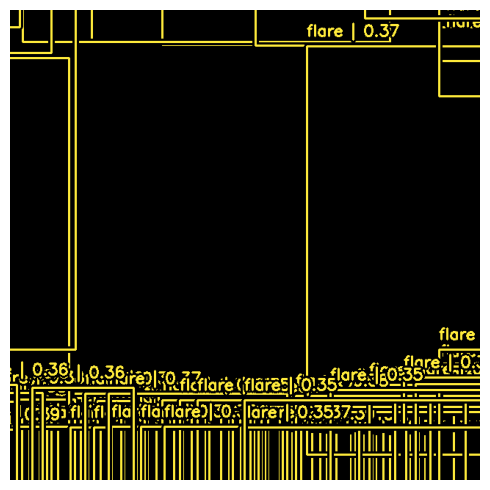

In [147]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from keras_cv import visualization  # Import the visualization module

def visualize_detections(model, img_path):
    # Load and preprocess the image
    img = Image.open(img_path)
    img_resized = img.resize((640, 640))
    img_array = np.array(img_resized) / 255.0

    image_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
    batch_tensor = tf.expand_dims(image_tensor, axis=0)

    y_pred = model.predict(batch_tensor)

    visualization.plot_bounding_box_gallery(
        batch_tensor,
        value_range=(0, 255),
        rows=1,
        cols=1,
        y_pred=y_pred,
        scale=5,
        font_scale=0.7,
        bounding_box_format="xywh",
        class_mapping=class_mapping,
    )


# Visualize detections on a single image
img_path = "./test-images/20230429_031500_1024_HMIIF.jpg"
visualize_detections(model, img_path)
